# 全连接神经网络房价预测

In [1]:
import paddle
import numpy as np
import os
import matplotlib.pyplot as plt

In [19]:
Batch = 0
Batchs = []
all_train_accs = []


def draw_train_acc(Batchs, train_accs):
    title = 'training accs'
    plt.title(title, fontsize=24)
    plt.xlabel('batch', fontsize=14)
    plt.ylabel('acc', fontsize=14)
    plt.plot(Batchs, train_accs, color='green', label='training accs')
    plt.legend()
    plt.grid()
    plt.show()


all_train_loss = []


def draw_train_loss(Batchs, train_loss):
    title = 'training loss'
    plt.title(title, fontsize=24)
    plt.xlabel('batch', fontsize=14)
    plt.ylabel('loss', fontsize=14)
    plt.plot(Batchs, train_loss, color='red', label='training loss')
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
# 绘制真实值和预测值对比图
def draw_infer_result(ground_truths, infer_results):
    title = 'Boston'
    plt.title(title, fontsize=24)
    x = np.arange(1, 20)
    y = x
    plt.plot(x, y)
    plt.xlabel('ground truth', fontsize=14)
    plt.ylabel('infer result', fontsize=14)
    plt.scatter(ground_truths, infer_results, color='green', label='training cost')
    plt.grid()
    plt.show()

# 1.加载数据集

In [4]:
uci_housing = paddle.text.datasets.UCIHousing(mode='train')
for i in range(10):
    feature, target = uci_housing[i]
    feature = paddle.to_tensor(feature)
    target = paddle.to_tensor(target)
    print(feature, target)

Tensor(shape=[13], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [-0.04054410,  0.06636363, -0.32356226, -0.06916996, -0.03435197,
         0.05563625, -0.03475696,  0.02682186, -0.37171334, -0.21419305,
        -0.33569506,  0.10143217, -0.21172912]) Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [24.])
Tensor(shape=[13], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [-0.04030818, -0.11363637, -0.14907546, -0.06916996, -0.17632729,
         0.02612869,  0.10633469,  0.10658070, -0.32823509, -0.31724647,
        -0.06973761,  0.10143217, -0.09693883]) Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [21.60000038])
Tensor(shape=[13], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [-0.04030840, -0.11363637, -0.14907546, -0.06916996, -0.17632729,
         0.17251688, -0.07698148,  0.10658070, -0.32823509, -0.31724647,
        -0.06973761,  0.09116942, -0.23794325]) Tensor(shape=[

In [5]:
# 加在训练集 验证集
train_dataset = paddle.text.datasets.UCIHousing(mode='train')
eval_dataset = paddle.text.datasets.UCIHousing(mode='test')

train_loader = paddle.io.DataLoader(train_dataset, batch_size=32, shuffle=True)
eval_loader = paddle.io.DataLoader(eval_dataset, batch_size=8, shuffle=True)

# 2.网络搭建

In [6]:
class MyDNN(paddle.nn.Layer):
    def __init__(self):
        super(MyDNN, self).__init__()
        # 定义一层全连接层，输出维度是1，激活函数为None，即不使用激活函数
        self.linear = paddle.nn.Linear(13, 1, None)

    # 网络的前向计算函数
    def forward(self, inputs):
        x = self.linear(inputs)
        return x

# 3.网络训练 测试

epoch:0, step:10, train_loss:751.6680297851562
epoch:1, step:10, train_loss:705.623779296875
epoch:2, step:10, train_loss:815.0472412109375
epoch:3, step:10, train_loss:627.60546875
epoch:4, step:10, train_loss:605.782470703125
epoch:5, step:10, train_loss:667.4259033203125
epoch:6, step:10, train_loss:660.5113525390625
epoch:7, step:10, train_loss:723.3909301757812
epoch:8, step:10, train_loss:478.887451171875
epoch:9, step:10, train_loss:645.9984130859375
epoch:10, step:10, train_loss:452.9259948730469
epoch:11, step:10, train_loss:456.0542297363281
epoch:12, step:10, train_loss:311.23138427734375
epoch:13, step:10, train_loss:432.3153991699219
epoch:14, step:10, train_loss:357.20184326171875
epoch:15, step:10, train_loss:428.505615234375
epoch:16, step:10, train_loss:363.4014892578125
epoch:17, step:10, train_loss:587.9222412109375
epoch:18, step:10, train_loss:369.06317138671875
epoch:19, step:10, train_loss:309.20068359375
epoch:20, step:10, train_loss:364.5614013671875
epoch:21, 

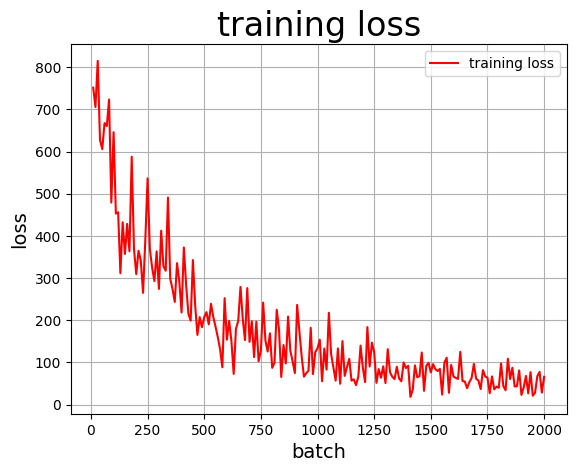

In [20]:
model = MyDNN()
# 声明 model 用于训练
model.train()

# 定义损失 均方误差
mse_loss = paddle.nn.MSELoss()

# 优化器 SGD随机梯度下降
# learning_rate：学习率
# parameters：优化参数
opt = paddle.optimizer.SGD(learning_rate=0.0005, parameters=model.parameters())

# 训练轮数
epochs_num = 200

for epochs in range(epochs_num):
    for batch_id, data in enumerate(train_loader()):
        feature = data[0]
        label = data[1]
        predict = model(feature)
        loss = mse_loss(predict, label)
        if batch_id != 0 and batch_id % 10 == 0:
            Batch += 10
            Batchs.append(Batch)
            all_train_loss.append(loss.numpy()[0])
            print('epoch:{}, step:{}, train_loss:{}'.format(epochs, batch_id, loss.numpy()[0]))
        loss.backward()
        opt.step()
        opt.clear_grad()
paddle.save(model.state_dict(), "mydnn")
draw_train_loss(Batchs, all_train_loss)

In [25]:
para_state_dict = paddle.load('mydnn')
model = MyDNN()
model.set_state_dict(para_state_dict)
model.eval()
losses = []
for batch_id, data in enumerate(eval_loader()):
    feature = data[0]
    label = data[1]
    predict = model(feature)
    loss = mse_loss(predict, label)
    losses.append(loss.numpy()[0])

avg_loss = np.mean(losses)
print(avg_loss)

17.568035
